In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [46]:
df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [47]:
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [27]:
"""
"pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.\n",
        "Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. \n",
        "După instalare trebuie să facem restart la runtime."
"""

'\n"pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.\n",\n        "Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. \n",\n        "După instalare trebuie să facem restart la runtime."\n'

In [28]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [29]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 3.1MB 7.3MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 614kB 17.5MB/s 
     |████████████████████████████████| 296kB 29.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=b833084092eacc0857ee8e9e6a8952eb590b8168c68d151450246fb9e50b14e4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=bb11918b79b75fc83fcd97fa0372356950efefadebad6a7da5bd166b24c67dce
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=3057fe9bfe88eca9eebcd6a925a0ada240b3ca83dbe786f862d7f

In [0]:
from pandas_profiling import ProfileReport

In [0]:
prof=ProfileReport(df)

In [9]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [10]:
prof

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [50]:
prof.to_file(output_file='/content/output-min.html')

In [51]:
prof

In [0]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [55]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(131, 242)

In [56]:
sum(y_test), len(y_test)

(34, 61)

In [0]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [58]:
X_train

age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
219   48    1   0       130   256  ...      1      0.0      2   2     3
109   50    0   0       110   254  ...      0      0.0      2   0     2
25    71    0   1       160   302  ...      0      0.4      2   2     2
270   46    1   0       120   249  ...      0      0.8      2   0     3
293   67    1   2       152   212  ...      0      0.8      1   0     3
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
215   43    0   0       132   341  ...      1      3.0      1   0     3
146   44    0   2       118   242  ...      0      0.3      1   1     2
231   57    1   0       165   289  ...      0      1.0      1   3     3
187   54    1   0       124   266  ...      1      2.2      1   1     3
153   66    0   2       146   278  ...      0      0.0      1   1     2

[242 rows x 13 columns]

In [59]:
y_train

219    0
109    1
25     1
270    0
293    0
      ..
215    0
146    1
231    0
187    0
153    1
Name: target, Length: 242, dtype: int64

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_test

array([[ 0.04166667, -1.        ,  0.33333333, -0.22641509, -0.18721461,
         1.        ,  0.        ,  0.51145038, -1.        , -1.        ,
         1.        , -1.        ,  0.33333333],
       [-0.45833333,  1.        ,  0.33333333, -0.32075472, -0.75342466,
        -1.        ,  0.        ,  0.20610687, -1.        , -1.        ,
         1.        , -1.        ,  0.33333333],
       [ 0.29166667,  1.        , -1.        , -0.56603774, -0.52511416,
         1.        ,  0.        ,  0.35877863,  1.        , -0.5483871 ,
         1.        ,  0.        ,  1.        ],
       [-0.08333333, -1.        , -1.        , -0.32075472, -0.1826484 ,
        -1.        ,  0.        ,  0.08396947,  1.        , -0.61290323,
         0.        , -1.        ,  1.        ],
       [ 0.54166667,  1.        , -1.        ,  0.24528302, -0.53424658,
        -1.        , -1.        ,  0.02290076, -1.        , -0.25806452,
         1.        , -1.        , -0.33333333],
       [ 0.58333333, -1.      

In [0]:
import torch
from torch import nn, optim

In [64]:
X_train.shape

(242, 13)

In [65]:
y_train.shape

(242,)

In [66]:
X_test.shape

(61, 13)

In [0]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [0]:
class HeartDiseaseNN(nn.Module):
  def __init__(self):
    super(HeartDiseaseNN, self).__init__()

    #Sequential oferă o alternativă mai estetică a codului
    #Rețeaua noastră are 2 neuroni pentru output.
    #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
    self.sequential= nn.Sequential(
        nn.Linear(13,100),
        nn.ReLU(),
        nn.Linear(100, 60),
        nn.ReLU(),
        nn.Linear(60, 2)
    )

  def forward(self, x):
    return self.sequential(x)


In [0]:
net = HeartDiseaseNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()


In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
  # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
  # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
  net.train()

  #Obținem predictii
  outputs = net(X_train)
  # Compute and print loss
  loss = criterion(outputs, y_train)

  losses.append(loss.item())
  # Zero gradients, perform a backward pass, and update the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Train Epoch: {epoch} Loss:{loss.item():.4f}')


In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
  #Pune pe off flagurile setate in model.train()
  #Din nou, în exemplul nostru e pur demonstrativ.
  net.eval()

  test_loss=0
  correct = 0

  with torch.no_grad():

    output=net(X_test)

    test_loss= criterion(output, y_test)
    test_losses.append(test_loss.item())

    #Obținem predictiile pentru fiecare linie din setul de validare.
    #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
    pred = output.data.max(1, keepdim=True)[1]

    #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
    #correct += pred.eq(y_test.data.view_as(pred)).sum()
    #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

    accuracy = accuracy_score(y_test, pred)

    print("============")
    print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
    print("============")

    accuracies.append(accuracy)

In [77]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()
  

Streaming output truncated to the last 5000 lines.
[Validation set] Average loss: 0.7427453994750977, Accuracy: 78.68852459016394%
Train Epoch: 8751 Loss:0.0609
[Validation set] Average loss: 0.7428326606750488, Accuracy: 78.68852459016394%
Train Epoch: 8752 Loss:0.0609
[Validation set] Average loss: 0.7428526878356934, Accuracy: 78.68852459016394%
Train Epoch: 8753 Loss:0.0609
[Validation set] Average loss: 0.742855966091156, Accuracy: 78.68852459016394%
Train Epoch: 8754 Loss:0.0608
[Validation set] Average loss: 0.7429543137550354, Accuracy: 78.68852459016394%
Train Epoch: 8755 Loss:0.0608
[Validation set] Average loss: 0.7430177330970764, Accuracy: 78.68852459016394%
Train Epoch: 8756 Loss:0.0608
[Validation set] Average loss: 0.7430487871170044, Accuracy: 78.68852459016394%
Train Epoch: 8757 Loss:0.0608
[Validation set] Average loss: 0.7430830001831055, Accuracy: 78.68852459016394%
Train Epoch: 8758 Loss:0.0608
[Validation set] Average loss: 0.7432004809379578, Accuracy: 78.688524

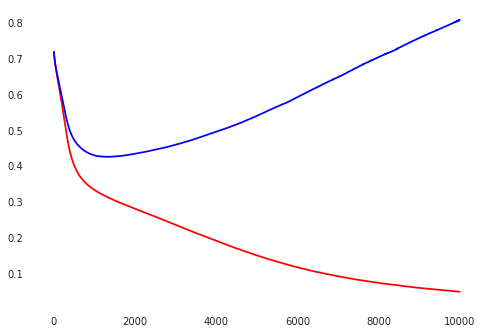

In [78]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")


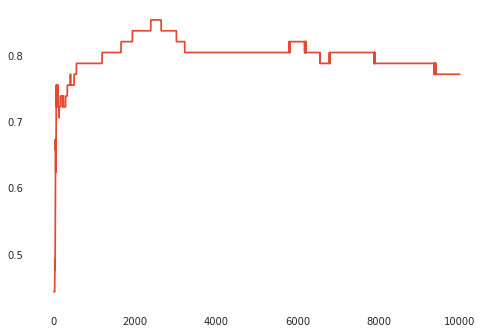

In [79]:
plt.plot(accuracies)

In [0]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    print(preds_y)
    

In [83]:
try_a_single_example_with_the_network(60)

tensor([0])
